# CNNの例題 Dog or Cat画像判別

# Load Dataset
1. Download the dataset from kaggle web page.
https://www.kaggle.com/c/dogs-vs-cats/data?select=train.zip
2. Unzip the dataset files in cnn_dog_vs_cat_original_data folder.

In [1]:
import os, shutil

original_dataset_dir = '.\\datasets\\cnn_dog_vs_cat_original_data'
base_dir = '.\\datasets\\cnn_dog_vs_cat'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)


test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [2]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


# Initial setting for tensorflow

In [9]:
%matplotlib inline

import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import mnist

np.random.seed(20200426)
tf.random.set_seed(20200426)

print("tensorflow version : " + tf.__version__)

tensorflow version : 2.3.1


# Create deep learning layer

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

# Modify the input data

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#学習データが少ないため、回転・平行移動・拡大等でデータ拡張(水増し)を行う
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

#検証データは水増しを行うべきではない
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Training

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
10/10 [==============================] - 15s 2s/step - loss: 0.7036 - accuracy: 0.5125 - val_loss: 0.6929 - val_accuracy: 0.5100
Epoch 2/10
10/10 [==============================] - 9s 930ms/step - loss: 0.6958 - accuracy: 0.4844
Epoch 3/10
10/10 [==============================] - 9s 900ms/step - loss: 0.6884 - accuracy: 0.5250
Epoch 4/10
10/10 [==============================] - 9s 906ms/step - loss: 0.6931 - accuracy: 0.5437
Epoch 5/10
10/10 [==============================] - 9s 908ms/step - loss: 0.6912 - accuracy: 0.4969
Epoch 6/10
10/10 [==============================] - 9s 908ms/step - loss: 0.6947 - accuracy: 0.4844
Epoch 7/10
10/10 [==============================] - 9s 923ms/step - loss: 0.6836 - accuracy: 0.5656
Epoch 8/10
10/10 [==============================] - 9s 921ms/step - loss: 0.6891 - accuracy: 0.5375
Epoch 9/10
10/10 [==============================] - 9s 915ms/step - loss: 0.6898 - a

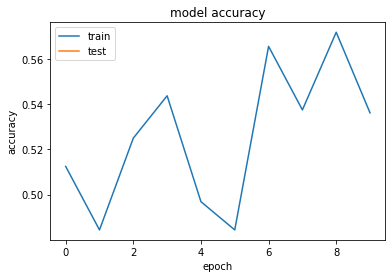

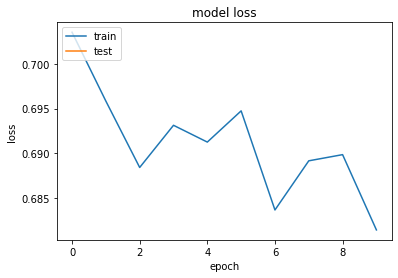

In [6]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

training = model.fit_generator(
      train_generator,
      #steps_per_epoch=100,
      steps_per_epoch=10,
      #epochs=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

#正答率
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Save the model

In [7]:
model.save('models\\cnn_dog_vs_cat.h5')
model.save('models/cnn_dog_vs_cat.h5')

print(model.input)
print(model.output)

Tensor("conv2d_input:0", shape=(None, 150, 150, 3), dtype=float32)
Tensor("dense_1/Sigmoid:0", shape=(None, 1), dtype=float32)


In [11]:
model = models.load_model('models\\cnn_dog_vs_cat.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [12]:
img_path = 'data\\cat.1700.jpg'

from tensorflow.keras.preprocessing import image

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


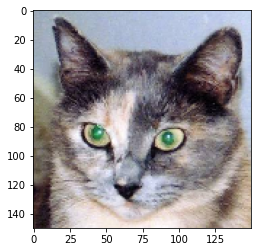

In [13]:
plt.imshow(img_tensor[0])
plt.show()

In [19]:
#出力側の8つの層から出力を抽出
print('\n抽出した出力')
layer_outputs = [layer.output for layer in model.layers[:8]]
print(layer_outputs)

#入力は画像データ、出力は各層の活性化状態となるモデルを作成
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)


抽出した出力
[<tf.Tensor 'conv2d/Relu_1:0' shape=(None, 148, 148, 32) dtype=float32>, <tf.Tensor 'max_pooling2d/MaxPool_1:0' shape=(None, 74, 74, 32) dtype=float32>, <tf.Tensor 'conv2d_1/Relu_1:0' shape=(None, 72, 72, 64) dtype=float32>, <tf.Tensor 'max_pooling2d_1/MaxPool_1:0' shape=(None, 36, 36, 64) dtype=float32>, <tf.Tensor 'conv2d_2/Relu_1:0' shape=(None, 34, 34, 128) dtype=float32>, <tf.Tensor 'max_pooling2d_2/MaxPool_1:0' shape=(None, 17, 17, 128) dtype=float32>, <tf.Tensor 'conv2d_3/Relu_1:0' shape=(None, 15, 15, 128) dtype=float32>, <tf.Tensor 'max_pooling2d_3/MaxPool_1:0' shape=(None, 7, 7, 128) dtype=float32>]


In [ ]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

In [ ]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]

    size = layer_activation.shape[1]

    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()